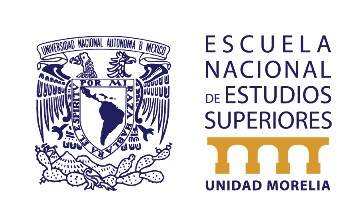
<h2><center>Licenciatura en Tecnologías para la Información en Ciencias</center></h2>
<h2><center>Introducción a la Ciencia de Datos</center></h2>
<h2><center>Proyecto 4 - Web scraping with Scrapy.</center></h2>
<h2><center>Luis David Huante García</center></h2>
<h2><center>Matrícula: 420138905</center></h2>
<h2><center>A 22 de junio de 2022</center></h2>



## Introducción


Como ya se ha explicado en los proyectos anteriores, el proceso de Web Scraping es fundamental en la vida diaria de un científico de datos. Hoy en día existen diversas limitantes y detalles particulares que pueden complicar este proceso, por ejemplo, algunos sitios como Amazon limitan en formas particulares el Scraping y no todas las librerías tienen la misma capacidad de resolver de manera eficiente las diferenres dificultades que pueden surgir a la hora de realizar este proceso. Es por esta razón, que para la realización de este proyecto se usará Scrapy, una librería de Python dedicada al Web Scraping y con una cantdad extensa de funcionalidades que harán del proceso más óptimo, rápido y eficaz.


Usaremos Scrapy para procesar las rutas de XPath del World Factbook de la CIA y acceder a sus datos. Se procesará la página y obtendremos los datos que queremos. Se usará también el proceso de Data Wrangling y la librería Pandas ya vista en clase.


## Problemáticas

El proceso de Web Scraping en esta página en particular resultó complicado al principio por diversas razones. Primeramente, en la sección de Countries del sitio de la CIA, la lista está generada dinámicamente en el sitio. Al no tener todos los sitios que necesitamos en un sólo sitio, podríamos usar el proceso de `follow` integrado en Scrapy para ir avanzando en las páginas de los páises de cada sección. 

Sin embargo, al buscar más a fondo en la estructura de la página, encontré que al entrar en las páginas por continente, aparecían los vínculos a las páginas individuales de cada país, hecho que podría facilitar el proceso de Scraping al tener menos páginas por recorrer. Finalmente, decidí usar esta alternativa para scrapear el sitio. A pesar de que salen algunas islas y territorios no reglamentarios, podremos analizar el CSV que usaremos al final y eliminar lo que no necesitemos en el proceso de Data Wrangling.

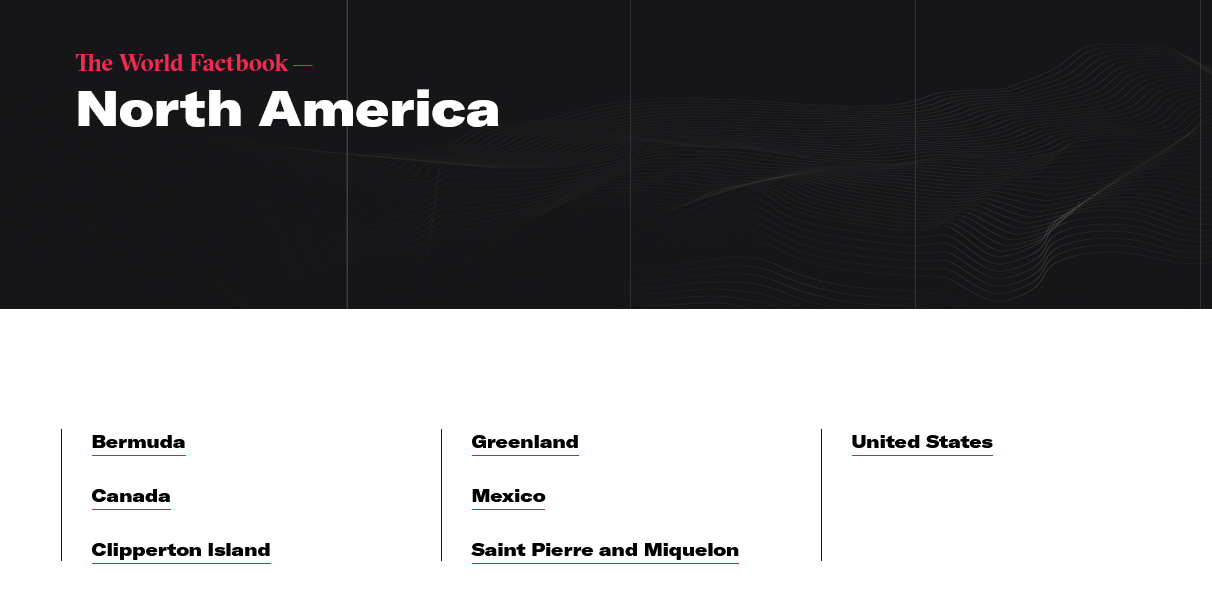

## Scraping

El scraping consistió en usar la página extraer cada dato disponible de todos los países encontrados en las páginas de las secciones de región.  para posteriormente, exportar todos los datos encontrados a un archivo csv o en una carpeta, en el caso de las imágenes. 

Usé las clases y los archivos predefinidos de Scrapy `items.py` `piplelines.py` y `cia_scraper.py` cuyas funcionalidades serán explicadas a continuación.

#### pipelines.py

Después de que un spider extrae un elemento, se envía a Item Pipeline, que lo procesa a través de varios componentes que se ejecutan secuencialmente. cada componente de canalización de elementos es una clase de Python que implementa un método simple. Reciben un elemento y realizan una acción sobre él, y también deciden si el elemento debe continuar a través de la canalización o descartarse y dejar de procesarse.

Los usos principales que se le da al elemento de `pipelines.py` son:

1. Limpiar datos de HTML.
2. Validación de datos extraídos.
3. Verificar si existen duplicados y eliminarlos.
4. Guardar los datos en una base de datos.


En la sección de pipelines, las líneas más importantes son las mostradas a continuación, que son donde se crea el documento CSV a utilizar.
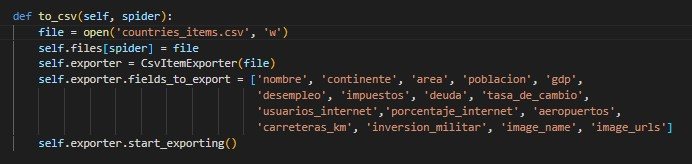

#### items.py

Sabiendo que el principal objetivo del Scraping es extraer datos estructurados de fuentes no estructuradas, los spider pueden devolver los datos extraídos como elementos u objetos de Python definidos por pares clave-valor. Scrapy admite múltiples tipos de elementos. 

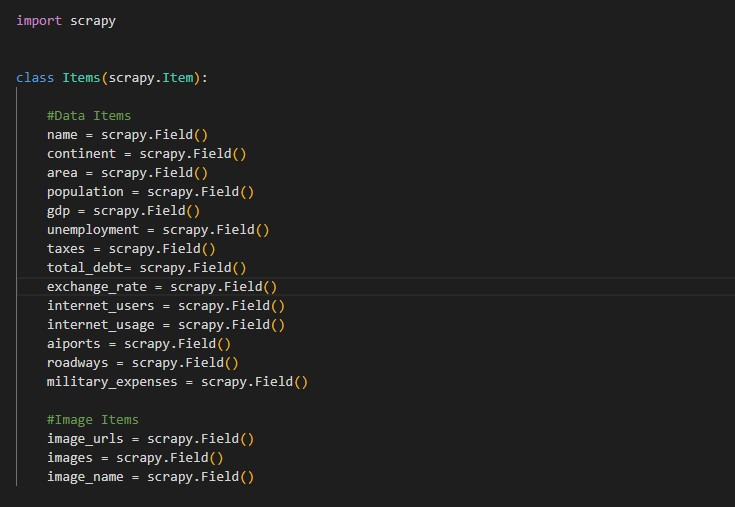

#### cia_scraper.py

Este es el elemento principal de nuestro scraper, donde definiremos todos los demás elementos, introduciremos los comandos de XPath y haremos el scraping.

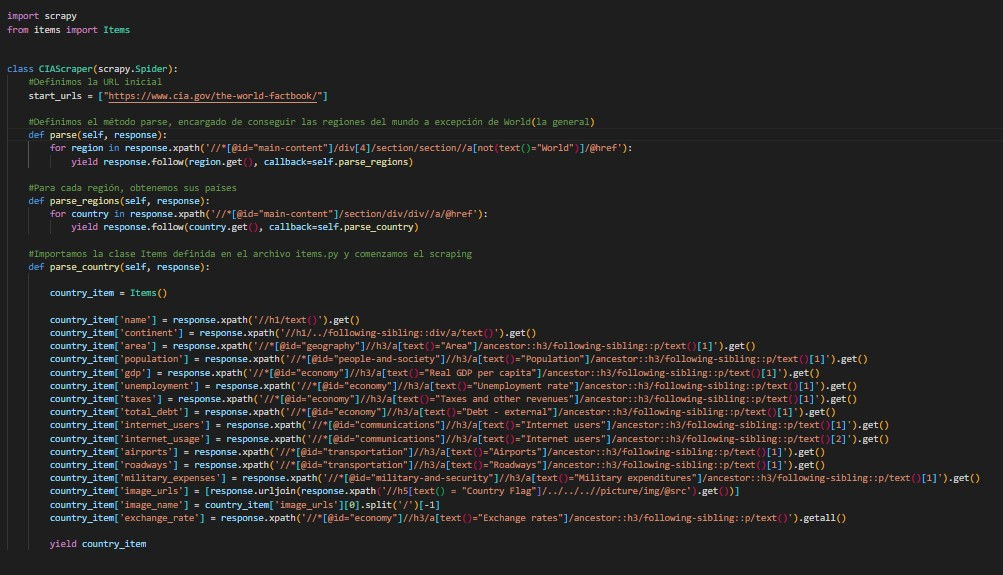

## Data Wrangling

Ya teniendo nuestro archivo descargado y con los datos extraídos, podemos empezar el proceso de Data Wrangling para poder comenzar a manipular los datos con los propósitos de este proyecto. Este archivo tiene muchas inconsistencias, columnas completas con datos fuera de formato que debemos corregir, ya que el scraping no eliminó los elementos inútiles de nuestras columnas y esto se traspasó al dataframe.

In [103]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
import re
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [78]:
df = pd.read_csv('cia_countries.csv')
df.sort_values(by=['nombre'], inplace = True,  ignore_index=True)
df

,nombre,continente,area,poblacion,gdp,desempleo,impuestos,deuda,tasa_de_cambio,usuarios_internet,porcentaje_internet,aeropuertos,carreteras_km,inversion_militar,image_name,image_urls
0,Afghanistan,South Asia,"652,230 sq km","37,466,414 (July 2021 est.)","$2,065 (2019 est.)",23.9% (2017 est.),11.2% (of GDP) (2017 est.),$284 million (FY10/11),7.87 (2017 est.),"4,717,013",13.5% (July 2018 est.),46 (2020),"34,903 km (2017)",1.2% of GDP (2019),AF-flag.jpg,https://www.cia.gov/the-world-factbook/static/...
1,Akrotiri,Europe,123 sq km,"approximately 18,195 on the Sovereign Base Are...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 (2020),NaN,NaN,AX-flag.jpg,https://www.cia.gov/the-world-factbook/static/...
2,Albania,Europe,"28,748 sq km","3,088,385 (July 2021 est.)","$13,965 (2019 est.)",5.83% (2019 est.),27.6% (of GDP) (2017 est.),$9.311 billion (2019 est.),102.43 (2020 est.),"2,196,613",71.85% (July 2018 est.),3 (2020),"3,945 km (2018)",1.3% of GDP (2020 est.),AL-flag.jpg,https://www.cia.gov/the-world-factbook/static/...
3,Algeria,Africa,"2,381,740 sq km","43,576,691 (July 2021 est.)","$11,511 (2019 est.)",11.7% (2017 est.),32.3% (of GDP) (2017 est.),$5.574 billion (2019 est.),131.085 (2020 est.),"24,819,531",59.58% (July 2018 est.),149 (2020),"104,000 km (2015)",6% of GDP (2019),AG-flag.jpg,https://www.cia.gov/the-world-factbook/static/...
4,American Samoa,Australia - Oceania,224 sq km,"46,366 (July 2021 est.)","$11,200 (2016 est.)",29.8% (2005),37.8% (of GDP) (2016 est.),NaN,1,"17,000",31.3% (July 2016 est.),3 (2020),241 km (2016),NaN,AQ-flag.jpg,https://www.cia.gov/the-world-factbook/static/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,kingman-reef,https://www.cia.gov/the-world-factbook/countri...
253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,johnston-atoll,https://www.cia.gov/the-world-factbook/countri...
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jarvis-island,https://www.cia.gov/the-world-factbook/countri...
255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,howland-island,https://www.cia.gov/the-world-factbook/countri...


Le hacemos drop a las columnas que sólo tienen link de imagen.

In [79]:
df = df[df['nombre'].notna()]

Dado que todas las columnas están fuera del formato que nosotros buscamos, debemos hacer los ajustes necesarios para cada una.

In [80]:
#Área
#Reemplazamos todas las comas por espacios vacíos
area = df['area']
area = area.str.replace(',','')
counter = 0

#Hacemos split para acceder a los primeros números
#Con un contador accedemos a todos los elementos de la columna y le aplicamos la función si tienen un punto.
for a in area.str.split():
    area[counter] = a[0]
    if '.' in area[counter]: 
        area[counter] = str(float(area[counter])*1000000) 
    counter += 1

df['area'] = area
df['area'] = pd.to_numeric(df['area'])


In [81]:
#Población
#Creamos una expresión regular para eliminar todo lo que esté dentro de un paréntesis, esta función será
#útil para las demás funciones de limpieza.
population = df['poblacion'].str.replace('\(.*\)','', regex = True)
population = population.str.replace(',','')
counter = 0

for row in population.str.split(): 
    data_exists = False
    for data in row:
        if data.isnumeric(): 
            area[counter] = data
            data_exists = True
            break
            
    if data_exists == False:
        area[counter] = "" 
        
    counter += 1
    
df['poblacion'] = area
df['poblacion'] = pd.to_numeric(df['poblacion'])

In [82]:
#GDP
#Tomamos el primer elemento después de aplicar split y quitamos comas y signos.
gdp = df['gdp'].str.split().str[0]
gdp = gdp.str.replace('$','', regex = False)
gdp = gdp.str.replace(',','')
df['gdp'] = gdp
df['gdp'] = pd.to_numeric(df['gdp'])

Para proceder a clasificar de manera categórica el GDP de cada fila, creamos la función correspondiente, que podemos reciclar del proyecto de Métricas y validación cruzada.

In [83]:
def categoric_gdp(i):
    if i < 50:
        return np.nan
                    
    elif 50 <= i <= 5000:
         return 'Ingreso bajo'
           
    elif 5000 < i < 25000:
        return 'Ingreso medio'
            
    elif i > 25000:
        return 'Ingreso alto'
     
df['gdp'] = df['gdp'].apply(categoric_gdp)

In [84]:
#Desempleo
#Hacemos un proceso similar al de GDP.
desempleo = df['desempleo'].str.split().str[0]
desempleo = desempleo.str.replace('%','')
df['desempleo'] = desempleo
df['desempleo'] = pd.to_numeric(df['desempleo'])

In [85]:
#Impuestos
impuestos = df['impuestos'].str.split().str[0]
impuestos = impuestos.str.replace('%','')
df['impuestos'] = impuestos
df['impuestos'] = pd.to_numeric(df['impuestos'])

In [ ]:
#Deuda
deuda = df['deuda']
deuda = deuda.str.replace('$','', regex = False)
deuda = deuda.str.replace(',','', regex = False)
deuda = deuda.str.replace('\(.*\)','', regex = True)
counter = 0


for i in deuda.str.split().str[1]:
    if i[1] == 'million':
        deuda[counter] = str(float(i[0])*1000000)
    elif i[1] == 'billion' :
        deuda[counter] = str(float(i[0])*1000000000)
    elif i[1] == 'trillion':
        deuda[counter] = str(float(i[0])*1000000000000)
    else:
        deuda[counter] = i[0]

In [87]:
#Internet
internet = df['usuarios_internet'].str.replace(',','')
internet =internet.str.split().str[0]
counter = 0

for i in internet:
    if i != i: 
        internet[counter] = i
    else:
        if('.' in i):
            internet[counter] = str(float(i)*1000000)
    counter += 1
            
df['usuarios_internet'] = internet
df['usuarios_internet'] = pd.to_numeric(df['usuarios_internet'])

In [88]:
#Porcentaje de población con internet
pct = df['porcentaje_internet'].str.split().str[0]
pct = pct.str.replace('%','')
df['porcentaje_internet'] = pct
df['porcentaje_internet'] = pd.to_numeric(df['porcentaje_internet'])

In [89]:
#Aeropuertos
airports = df['aeropuertos']
airports = airports.str.replace(',','')
airports = airports.str.split().str[0]
df['aeropuertos'] = airports
#Coerce convierte los datos que no se pueden parsear a NaN
df['aeropuertos'] = pd.to_numeric(airports,errors='coerce')

In [90]:
#Carreteras
carreteras = df['carreteras_km']
carreteras = carreteras.str.replace(',','')
carreteras = carreteras.str.split().str[0]
df['carreteras_km'] = carreteras
df['carreteras_km'] = pd.to_numeric(df['carreteras_km'], errors='coerce')

In [91]:
#Gastos militares
expenses = df['inversion_militar'].str.replace('%','')
expenses = expenses.str.split().str[0]
df['inversion_militar'] = expenses
df['inversion_militar'] = pd.to_numeric(df['inversion_militar'], errors='coerce')

In [92]:
df

,nombre,continente,area,poblacion,gdp,desempleo,impuestos,deuda,tasa_de_cambio,usuarios_internet,porcentaje_internet,aeropuertos,carreteras_km,inversion_militar,image_name,image_urls
0,Afghanistan,South Asia,652230.0,37466414.0,Ingreso bajo,23.90,11.2,284 million,7.87 (2017 est.),4717013.0,13.50,46.0,34903.0,1.2,AF-flag.jpg,https://www.cia.gov/the-world-factbook/static/...
1,Akrotiri,Europe,123.0,18195.0,None,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,AX-flag.jpg,https://www.cia.gov/the-world-factbook/static/...
2,Albania,Europe,28748.0,3088385.0,Ingreso medio,5.83,27.6,9.311 billion,102.43 (2020 est.),2196613.0,71.85,3.0,3945.0,1.3,AL-flag.jpg,https://www.cia.gov/the-world-factbook/static/...
3,Algeria,Africa,2381740.0,43576691.0,Ingreso medio,11.70,32.3,5.574 billion,131.085 (2020 est.),24819531.0,59.58,149.0,104000.0,6.0,AG-flag.jpg,https://www.cia.gov/the-world-factbook/static/...
4,American Samoa,Australia - Oceania,224.0,46366.0,Ingreso medio,29.80,37.8,NaN,1,17000.0,31.30,3.0,241.0,NaN,AQ-flag.jpg,https://www.cia.gov/the-world-factbook/static/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Wallis and Futuna,Australia - Oceania,142.0,15851.0,Ingreso bajo,8.80,16.7,3.67 million,110.2 (2015 est.),3450.0,22.10,2.0,NaN,NaN,WF-flag.jpg,https://www.cia.gov/the-world-factbook/static/...
246,West Bank,Middle East,5860.0,2949246.0,Ingreso medio,27.90,13.4,1.662 billion,3.606 (2017 est.),2673000.0,57.40,2.0,4686.0,NaN,west-bank,https://www.cia.gov/the-world-factbook/countri...
247,Yemen,Middle East,527968.0,30399243.0,Ingreso bajo,27.00,9.0,6.805 billion,275 (2017 est.),7659884.0,26.72,57.0,71300.0,4.3,YM-flag.jpg,https://www.cia.gov/the-world-factbook/static/...
248,Zambia,Africa,752618.0,19077816.0,Ingreso bajo,15.00,17.4,11.66 billion,21.065 (2020 est.),2351646.0,14.30,88.0,67671.0,1.2,ZA-flag.jpg,https://www.cia.gov/the-world-factbook/static/...


Con esto, ya podemos empezar a responder las preguntas correspondientes.
1. ¿Existe alguna relación entre el GDP (PIB) de un país, en términos de su poder adquisitivo, y su porcentaje de usuarios de Internet?

2. ¿Además, la tendencia resulta similar para países con ingreso económico bajo, mediano y alto?

Para resolver dichas preguntas, podemos analizar las columnas del porcentaje de usuarios de internet y el GDP de cada país para observar con mayor claridad los datos.

In [112]:
question_df = df[(df['porcentaje_internet'].notna()) & (df['gdp'].notna())]

In [101]:
question_df 

,nombre,continente,area,poblacion,gdp,desempleo,impuestos,deuda,tasa_de_cambio,usuarios_internet,porcentaje_internet,aeropuertos,carreteras_km,inversion_militar,image_name,image_urls
0,Afghanistan,South Asia,652230.0,37466414.0,Ingreso bajo,23.90,11.2,284 million,7.87 (2017 est.),4717013.0,13.50,46.0,34903.0,1.2,AF-flag.jpg,https://www.cia.gov/the-world-factbook/static/...
2,Albania,Europe,28748.0,3088385.0,Ingreso medio,5.83,27.6,9.311 billion,102.43 (2020 est.),2196613.0,71.85,3.0,3945.0,1.3,AL-flag.jpg,https://www.cia.gov/the-world-factbook/static/...
3,Algeria,Africa,2381740.0,43576691.0,Ingreso medio,11.70,32.3,5.574 billion,131.085 (2020 est.),24819531.0,59.58,149.0,104000.0,6.0,AG-flag.jpg,https://www.cia.gov/the-world-factbook/static/...
4,American Samoa,Australia - Oceania,224.0,46366.0,Ingreso medio,29.80,37.8,NaN,1,17000.0,31.30,3.0,241.0,NaN,AQ-flag.jpg,https://www.cia.gov/the-world-factbook/static/...
5,Andorra,Europe,468.0,85645.0,Ingreso alto,3.70,69.0,0,0.885 (2017 est.),78483.0,91.57,NaN,320.0,NaN,AN-flag.jpg,https://www.cia.gov/the-world-factbook/static/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Wallis and Futuna,Australia - Oceania,142.0,15851.0,Ingreso bajo,8.80,16.7,3.67 million,110.2 (2015 est.),3450.0,22.10,2.0,NaN,NaN,WF-flag.jpg,https://www.cia.gov/the-world-factbook/static/...
246,West Bank,Middle East,5860.0,2949246.0,Ingreso medio,27.90,13.4,1.662 billion,3.606 (2017 est.),2673000.0,57.40,2.0,4686.0,NaN,west-bank,https://www.cia.gov/the-world-factbook/countri...
247,Yemen,Middle East,527968.0,30399243.0,Ingreso bajo,27.00,9.0,6.805 billion,275 (2017 est.),7659884.0,26.72,57.0,71300.0,4.3,YM-flag.jpg,https://www.cia.gov/the-world-factbook/static/...
248,Zambia,Africa,752618.0,19077816.0,Ingreso bajo,15.00,17.4,11.66 billion,21.065 (2020 est.),2351646.0,14.30,88.0,67671.0,1.2,ZA-flag.jpg,https://www.cia.gov/the-world-factbook/static/...


Una vez teniendo los datos a analizar, debemos elegir la gráfica adecuada para observar la posible relación. Tenemos una variable categórica y una continua, por lo que debemos elegir una gráfica que muestre el valor del porcentaje para cada categoría en los países..

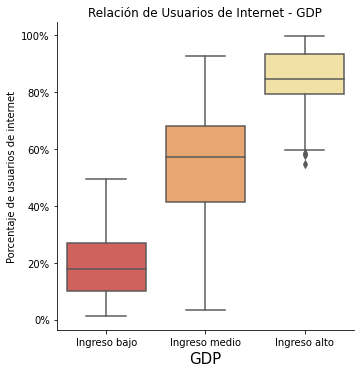

In [133]:
import matplotlib.ticker as mtick

sns.catplot(x='gdp', y='porcentaje_internet',kind='box', data=question_df)
sns.set_palette('Spectral')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylabel('Porcentaje de usuarios de internet')
plt.xlabel('GDP', size = 15)
plt.title("Relación de Usuarios de Internet - GDP")
plt.show()

En este caso, el diagrama de caja hace notar los porcentajes y las distribuciones que presentan de una manera sencilla de visualizar.

Podemos ahora realizar una gráfica `swarm plot` para identificar los datos esparcidos.

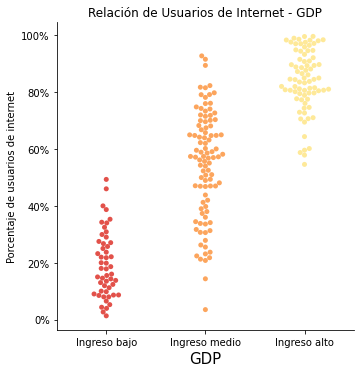

In [138]:
sns.catplot(x='gdp', y='porcentaje_internet',kind='swarm', data=question_df , height = 5)
sns.set_palette('Spectral')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylabel('Porcentaje de usuarios de internet')
plt.xlabel('GDP', size = 15)
plt.title("Relación de Usuarios de Internet - GDP")
plt.show()

Ya teniendo los datos esparcidos, podemos observar que los países de ingreso medio están en casi el total del porcentaje, es decir, es muy variable la relación, en los países de ingreso bajo se quedan en rangos de entre 0% y 50%; y los países de rango alto están por arriba del 60% con tan sólo algunos debajo de esa medida. 

Habiendo analizado ya las gráficas, podemos responder:
#### 1. ¿Existe alguna relación entre el GDP (PIB) de un país, en términos de su poder adquisitivo, y su porcentaje de usuarios de Internet?

Sí existe una relación entre el GDP de un país y el porcentaje de usuarios de Internet. En las gráficas realizadas, fue posible observar que los países con GDP  bajo tienen porcentajes de usuarios bajos también. Los países con ingreso alto tienen en su mayoría un porcentaje alto de usuarios de entre 70% y 100% la mayoría. Es evidente el contraste que existe en tre el porcentaje de usuarios de internet por cada país, ya que los países que invierten más en desarrollo tcnol+ógico tienen más porcentaje de internet.

#### 2. ¿Además, la tendencia resulta similar para países con ingreso económico bajo, mediano y alto?

Sí, ya que como ya fue demostrado, mientras un país tenga un mayor GDP, mayor será la probabilidad de tener un porcentaje alto de usuarios de internet; a menor GDP, lo contrario también es verdadero. Esto se cumple para las tres categorías de ingresos relacionados con GDP de ingreso bajo, medio y alto.

Sin embargo, existen algunas excepiones, como los datos de los países con alto GDP cuyo porcentaje estaba deajo del 60% Hay que tomar en consideración el hecho de que puede haber países que no están dentro del rango normal. Sin embargo, todos estos casos que acabamos de mencionar resultan ser la minorías en estos rangos

##  Conclusión

Una de las cosas más útiles sobre este proyecto fue que no se nos provió de un conjunto de datos ya definido, sino que lo creamos a través de Scrapy, herramienta cuyas funcionalidades y capacidades llamarón mucho mi atención. El principal reto de este proyecto fue el Web Scraping, ya que no había una ruta definida para realizar todo este porceso y el resultado conseguido fue a través de prueba y error de distintos métodos y alternativas. Por ejemplo, al principio no sabía si scrapear el sitio a través de la sección de **Countries** o de la sección de **World Regions**. Finalmente me decidí por la última, y la última parte complicada del trabajo consistió en generar las rutas de XPath para cada dato a scrapear.

Teniendo los datos ya recolectados, llegó otra ddificultad, que era limpiar los datos y extraer todos los elementos que no nos servirían y obstaculizarían el análisis de los mismos. Esta parte del proyecto también resultó complicada, ya que había muchas cosas que remover para cada columna, por lo que tuve que pensar y definir una lógica que permitiera formatear y limpiar adecuadamente los datos. Se usaron expresiones regulares y otras herramientas de Python para todo este proceso, y resultó muy provechoso ya que se aprendieron distintos métodos para realizar Data Wrangling.

Finalmente, el análisis de datos fue la parte más interesante del proyecto, ya que pudimos ver el desenlace y resultados de todo un proceso de extracciómn, formateo, limpieza y comprensión de los datos. Responder las preguntas indicadas resultó sencillo, pero poder llegar a demostrar gráficamente las respuestas fue la parte complicada.

Todo este proceso y sus commponentes, desde el Web Scraping, pasando por el Data Wrangling para finalmente pasar al Análisis de Datos, fue sumamente interesante, ya que todo se puede aplicar a cualquier disciplina. La Ciencia de Datos es fundamental hoy en día en la comprensión del mundo y sus fenómenos, ya que podemos observar con detalle las características de cualquiera a través de sus datos. Las posibilidades que tiene la aplicación de todos estos procesos en la vida cotidiana y la ciencia en general son vastas, y aunque los procesos por sí sólos no resultan muchas veces comprensibles o útiles a simple vista, una vez se junta todo lo que compone a la Ciencia de Datos es posible llegar a resultados muy interesantes.
